In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [51]:
#load_dataset
df = pd.read_csv(r"C:\Guvi_Zen\amazon_music_clustering\single_genre_artists.csv")
print(df.head())
print(df.info())

                 id_songs         name_song  popularity_songs  duration_ms  \
0  0IA0Hju8CAgYfV1hwhidBH           La Java                 0       161427   
1  1b8HZQCqcqwbzlA1jRTp6E          En Douce                 0       223440   
2  5d5gQxHwYovxR5pqETOIAa     J'en Ai Marre                 0       208267   
3  1EO65UEEPfy7CR0NK2sDxy  Ils n'ont pas ca                 0       161933   
4  6a58gXSgqbIsXUhVZ6ZJqe         La belote                 0       167973   

   explicit              id_artists release_date  danceability  energy  key  \
0         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.563   0.184    4   
1         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.427   0.180   10   
2         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.511   0.206    0   
3         0  4AxgXfD7ISvJSTObqm4aIE         1924         0.676   0.467    9   
4         0  4AxgXfD7ISvJSTObqm4aIE         1924         0.650   0.298    9   

   ...  acousticness  instrumentalness  liveness  valenc

In [52]:
#data_cleaning
df = df.drop(columns=["name_song", "name_artists", "id_songs"])
df = df.dropna()

In [54]:
#data_featuring 
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

X = df[features]


In [55]:
#featuring&scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

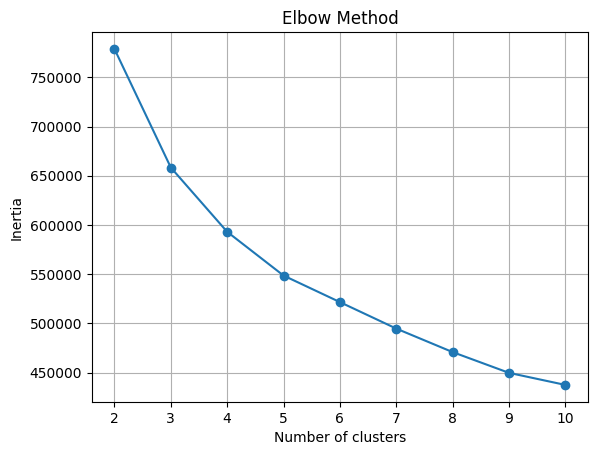

In [56]:
#Elbow_Method
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [57]:
#Apply_K-Means
k = 4  # choose based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [58]:
#Evaluate_Clustering
score = silhouette_score(X_scaled, df["cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.23106641264473862


In [59]:
#Interpret_Clusters
cluster_profile = df.groupby("cluster")[features].mean()
print(cluster_profile)

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.485341  0.415775 -13.954724     0.059929      0.646652   
1            0.634711  0.707636  -7.416184     0.077040      0.242192   
2            0.664340  0.466488 -13.385665     0.834554      0.585597   
3            0.505186  0.341825 -12.120023     0.060990      0.699190   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.810613  0.188557  0.449986  114.301014  231386.462428  
1                0.021039  0.201125  0.685616  125.294702  224649.058878  
2                0.000975  0.435223  0.583509  100.336080   96913.082601  
3                0.017446  0.183097  0.426877  113.401800  224876.823023  


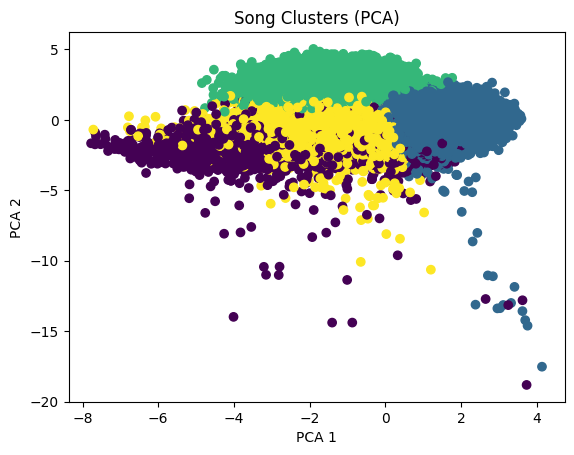

In [ ]:
#PCA_Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Song Clusters (PCA)")
plt.show()